<a href="https://colab.research.google.com/github/AlbertoBassanoni/MLPNS_ABassanoni/blob/main/lessons/MLPNS23_Lesson_14_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Riproducibilità e igiene del codice

Tutti i numeri in un esercizio di data analysis devono essere riprodotti esattamente usando il codice e i data row forniti da chi li ha analizzati.


Il concetto è abbastanza semplice se si lavora con pochi dati, e ovviamente diventa più complesso se i raw data sono dei big data. 


Tutto il materiale che produce le figure che vanno inserite in un paper va condiviso, in maniera tale che i ricercatori possano usare quel materiale per riprodurre i risultati trovati e rielaborarli.


Spesso per fare una simulazione si utilizza una simulazione MonteCarlo o una Markov Chain generiamo dei valori random. I numeri random prodotti dai package numbers in Python non sono generati totalmente casuale, visto che se faccio un istogramma dei valori che ottengo possono avere una distribuzione di probabilità che li assegna. c'è una funzione detta:

np.random.seed(125)

125 indica la seguenza che io utilizzerò. Nessuno è corretto o sbagliato a priori, ed è una condizione fondamentale per la riproducibilità. Serve per fissare lo stesso codice random. 

Per precauzione, ogni volta fai ripartire con "Restart and run all"

Ci vogliono gli axis labels! Se si fa una hitmap la colobar deve avere una label, e tutte le dimensioni del plot devono avere una label, e tutti i punti devono avere una caption, e bisogna dire "questo plot mostra...", "quel dato dice..."

Per tutta la comunità scientifica è molto semplice ora dare riproducibilità, basta sbatterlo su github ed allegarlo ad un articolo.

# Introduzione alla probabilità

Parliamo di una interpretazione frequentista di probabilità, in cui la probabilità che ciò avvenga è la frazione delle volte in cui qualcosa avvenga. E' soggetta ad errori, perché posso avere delle fluttuazioni dovuto al numero limitato di volte in cui faccio l'esperimento. Dal punto di vista frequentista, ripetendo l'esperimento più volte, avrò una corrispondenza tra probabilità e frequenza che un evento avvenga vanno a convergere (per la legge dei grandi numeri).

L'interpretazione bayesiana invece si basa sull'idea che a priori io posso conoscere il valore della probabilità di un dato evento prima di fare l'esperimento. Si ha che:

0 <= P(A) <= 1

P(A)+P(Ac)=1

se gli eventi sono disgiunti, ossia P(A) int P(B) = 0 allora:

P(A and B) = P(A)*P(B)

P(A or B) = P(A)+P(B)

Per eventi dipendenti, ossia eventi in cui P(A) int P(B) =\ 0 allora si ha che:

P(A|B)= P(A int B)/P(B)





# Introduzione alla statistica

E' una disciplina che ci permette di generalizzare un fenomeno da un numero limitato a un evento collettivo sulla popolazione. Diamo una tassonomia:

DISTRIBUZIONE: una formula, o modello

POPOLAZIONE: tutti gli elementi di una famiglia

SAMPLE: campione appartenente alla popolazione su cui si applica il modello. 

In fisica un esempio paradigmatico di larga applicazione di questa disciplina è la meccanica statistica, in cui si cerca di inferire sulle proprietà macroscopiche di un sistema a partire dalle proprietà microscopiche. 

# Statistica descrittiva

Ricordiamo il momento generatore di una distribuzione 

\int_{-infty}^{+infty}{(x-c)^n f(x) dx}

e vediamo i vari momenti:

per n=1 -> ho la media. Attenzione, distinguiamo all'interno di una distribuzione gli altri indici centrali sono la moda e la mediana.

per n=2 -> ho la varianza. Indice di dispersione, e spesso si usa la standard deviation che indica la larghezza media dalla media. In una distribuzione gaussiana spesso si contano le parti della distribuzione in termini di standard deviation, e posso connetterla alla probabilità con il "no hypothesis conjecture testing", cioè vedere se il nostro esperimento verifica P( X > 3(std. dev)=\0  (3 std. dev = 97.3 % area della curva gaussiana). La scelta del numero di std. dev dipende dal campo di ricerca. Ad esempio, in medicina 2 std. dev va bene, in fisica da 3 std. dev in su, in particle physics si usano 5 std. dev. Spesso si parla anche di range interquantile, associato alla mediana, e guardano ad una percentuale di valori in una certa area, e si usa spesso con delle distribuzioni asimmetriche.

# Distribuzioni di probabilità:

## distribuzioni binomiali:

Distribuzioni binomiali sono molto importanti, e su Wikipedia ho fondamentalmente tutto quello che mi serve. Spesso ho il:

Plot della densità di probabilità (probability mass function)

Plot della distribuzione cumulativa, ossia la somma o l'integrale della distribuzione di probabilità. La cumulativa è utile nel mio test statistico con le standard deviation.

parametri, come ad esempio n il numero di trials, p la probabilità di successo per ogni trial

supporto, ossia il numero di successi

pmf, probability mass function, e quindi espressione della funzione.

cdf, cumulative distribution function, e quindi espressione della cumulativa.

median, mode, mean and variance

skewness, cioè indice di asimmetria, e curtosi.

## distribuzione di Poisson

E' una funzione di distribuzione di probabilità per lo shut noise o il count noise, e si usa per ottenere l'innate noise in un natural steady state process (come i flussi stellari, le rain drops...). La funzione ha:

parametro lambda > 0

supporto k intero

pmf con lambda^k e^ - lambda / k!

## distribuzione Gaussiana

Distribuzione gaussiana, la regina delle distribuzioni, simmetrica rispetto alla media mu, amichevole e bellina. 

Ha pdf facile, e ben noto

ho mean, median, mode coincidenti

ho variance pari a sigma^2

ho skewness e curtosi pari a 0

Spesso nella maggioranza degli esperimenti e degli algoritmi di data analysis danno un'implicita assunzione di gaussianità. 

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np

# url = "https://github.com/fedhere/FDSfE_FBianco/blob/main/data/USyoutubes.csv?raw=true"

url = "https://bit.ly/videosfile"

In [ ]:
videos = pd.read_csv(url)
videos

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518
...,...,...,...,...,...,...,...,...,...,...
40944,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657
40945,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936
40946,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992
40947,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088


In [ ]:
videos.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [ ]:
videos.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count'],
      dtype='object')

In [ ]:
ncols =videos.describe().columns

In [ ]:
videos[ncols].mean()

category_id      1.997243e+01
views            2.360785e+06
likes            7.426670e+04
dislikes         3.711401e+03
comment_count    8.446804e+03
dtype: float64

In [ ]:
videos[ncols].std()

category_id      7.568327e+00
views            7.394114e+06
likes            2.288853e+05
dislikes         2.902971e+04
comment_count    3.743049e+04
dtype: float64

In [ ]:
videos_array = videos[ncols].values

In [ ]:
videos_array.shape

(40949, 5)

In [ ]:
videos_array.mean()

489445.9035385479

In [ ]:
videos_array.mean(axis=0)

array([1.99724291e+01, 2.36078464e+06, 7.42667024e+04, 3.71140089e+03,
       8.44680368e+03])

In [ ]:
videos_array.mean(axis=1)

array([ 164968.6,  506968.2,  670202. , ...,  223913.4, 1173941. ,
       2204197.8])

In [ ]:
videos_array.std()

3438235.954271628

In [ ]:
videos_array.std(axis=0)

array([7.56823442e+00, 7.39402347e+06, 2.28882543e+05, 2.90293515e+04,
       3.74300300e+04])

In [ ]:
videos_array.std(axis=1)

array([ 292425.42038311,  956563.79675992, 1261809.68799863, ...,
        421653.70061016, 2244617.03917947, 4052591.24303892])

In [ ]:
np.median(videos_array, axis= 0)

array([2.40000e+01, 6.81861e+05, 1.80910e+04, 6.31000e+02, 1.85600e+03])

In [ ]:
np.median(videos_array, axis= 1)

array([ 15954.,  12703.,   8181., ...,   3992.,  13088., 212976.])

In [ ]:
# altro comando molto comune è quello di CORRELATION
# perché farlo dall'inizio dell'analisi? dipende dalle proprietà statistiche dei dati
# è importante chiedersi se i dati siano distribuiti come una gaussiana o meno
# e fondamentale è sapere se i dati sono correlati oppure o no

# ci sono due variabili correlate (statistiche video di Youtube), che sono:
# views and likes
# views and dislikes

videos.corr()

,category_id,views,likes,dislikes,comment_count
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307
views,-0.168231,1.000000,0.849177,0.472213,0.617621
likes,-0.173921,0.849177,1.000000,0.447186,0.803057
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000


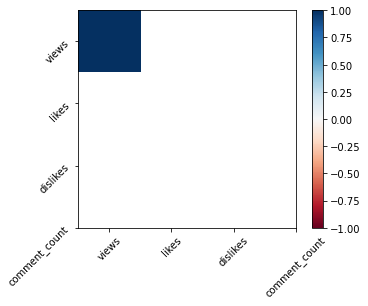

In [ ]:
pl.imshow(videos[ncols[-1:]].corr(), clim=(-1,1), cmap="RdBu");
pl.colorbar();
pl.xticks([0, 1, 2, 3], ["views", "likes", "dislikes", "comment_count"], rotation=45);
pl.yticks([0, 1, 2, 3], ["views", "likes", "dislikes", "comment_count"], rotation=45);

# Due teoremi importanti

Ci sono due teoremi fondamentali in questo corso da conoscere:

CENTRAL LIMIT THEOREM: Dati x1 ... xN un sample di N elementi da una popolazione con media mu e standard deviation sigma nel limite di N -> infty allora la mean del sample E[x1, ... , xN] tende ad una distribuzione gaussiana con media mu e con standard deviation mu e la rapidità con cui avviene questo processo è 1/sqrt(N); 

LAW OF LARGE NUMBERS: Supponiamo x1,... xN un sample di variabili indipendenti e identicamente distribuite di una popolazione con media mu e standard deviation sigma, tutte le variabili x1, ... xN hanno media mu e standard deviation sigma.  


